In [1]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

def generate_student_data(n_samples=5000):
    data = []
    
    for _ in range(n_samples):
        # 1. Demographic / Profile Data
        student_id = f"STU_{random.randint(10000, 99999)}"
        age = np.random.randint(18, 25)
        
        # Income Sources (The "Alternative Data")
        part_time_job_income = np.random.normal(800, 300) if np.random.random() > 0.4 else 0 # 60% have jobs
        parental_support = np.random.normal(500, 200) 
        total_monthly_income = max(part_time_job_income + parental_support, 200)
        
        # 2. Spending Behavior (The "Risk Signals")
        # Students who spend more than they earn are risky
        spend_to_income_ratio = np.random.normal(0.8, 0.3)
        avg_monthly_spend = total_monthly_income * spend_to_income_ratio
        
        # Frequent small transactions (coffee/food) vs Large transactions (tech/travel)
        avg_transaction_size = np.random.normal(25, 10)
        
        # 3. Financial History (if any)
        # 'nsf_count' = Non-Sufficient Funds (bounced checks/overdrafts) - HUGE risk signal
        nsf_count = 0
        if spend_to_income_ratio > 1.1:
            nsf_count = np.random.choice([0, 1, 2, 3], p=[0.4, 0.3, 0.2, 0.1])
        
        # 4. Target Variable: Did they Default? (1 = Yes, 0 = No)
        # Logic: High Spend/Income + NSF History + Low Income = High Risk
        risk_score = (spend_to_income_ratio * 0.5) + (nsf_count * 0.8) - (total_monthly_income * 0.0001)
        
        # Add some randomness to the default (real life isn't perfect)
        default_prob = 1 / (1 + np.exp(-(risk_score - 1.5))) # Sigmoid function
        is_default = 1 if np.random.random() < default_prob else 0
        
        data.append([student_id, age, total_monthly_income, avg_monthly_spend, 
                     spend_to_income_ratio, nsf_count, avg_transaction_size, is_default])

    columns = ['Student_ID', 'Age', 'Monthly_Income', 'Monthly_Spend', 
               'Spend_to_Income_Ratio', 'NSF_Count', 'Avg_Txn_Size', 'Default']
    
    return pd.DataFrame(data, columns=columns)

# Generate and View
df = generate_student_data()
print("Dataset Generated Successfully!")
print(f"Total Students: {len(df)}")
print(f"Default Rate: {df['Default'].mean():.2%}")
display(df.head())

Dataset Generated Successfully!
Total Students: 5000
Default Rate: 25.98%


,Student_ID,Age,Monthly_Income,Monthly_Spend,Spend_to_Income_Ratio,NSF_Count,Avg_Txn_Size,Default
0,STU_94551,24,1340.036994,590.498118,0.440658,0,46.416584,1
1,STU_94930,20,1927.250790,1270.362168,0.659158,0,30.425600,1
2,STU_14469,22,1221.107965,782.064430,0.640455,0,23.825245,0
3,STU_12989,24,1230.701605,1929.551092,1.567846,0,28.942330,0
4,STU_81250,22,915.868838,946.786546,1.033758,0,13.989022,0


=== Model Performance Report ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       730
           1       0.66      0.13      0.22       270

    accuracy                           0.75      1000
   macro avg       0.71      0.55      0.53      1000
weighted avg       0.73      0.75      0.68      1000



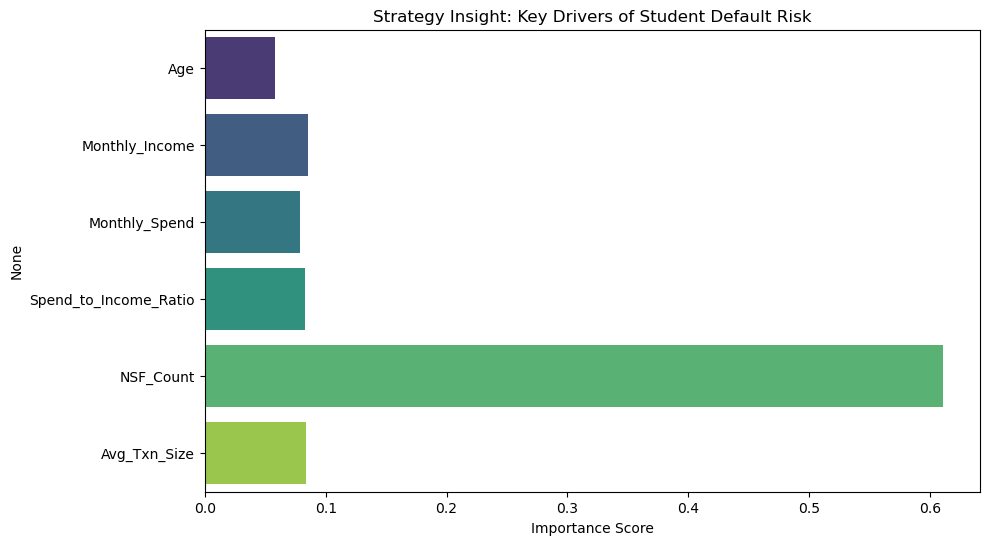

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data for Modeling
# Drop IDs (they aren't predictive) and the Target
X = df.drop(['Student_ID', 'Default'], axis=1)
y = df['Default']

# Split: 80% for Training, 20% for Testing (Simulating "Future Applicants")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the Model
# We use XGBoost - fast, accurate, and explainable
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 3. Predict on Test Data
y_pred = model.predict(X_test)

# 4. Evaluate Performance
print("=== Model Performance Report ===")
print(classification_report(y_test, y_pred))

# 5. STRATEGIC OUTPUT: Feature Importance
# This answers: "What actually causes a student to default?"
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
features = X.columns
sns.barplot(x=importance, y=features, hue=features, palette="viridis", legend=False)
plt.title("Strategy Insight: Key Drivers of Student Default Risk")
plt.xlabel("Importance Score")
plt.show()

In [3]:
# Project 1: Canadian Edition

In [4]:
import pandas as pd
import numpy as np
import random

# Set seed
np.random.seed(42)

def generate_canadian_student_data(n_samples=5000):
    data = []
    
    for _ in range(n_samples):
        student_id = f"CAN_{random.randint(10000, 99999)}"
        
        # 1. CANADIAN SPECIFIC DATA (The "Newcomer" Profile)
        # Most SDS students have a $10k-$20k GIC locked in the bank
        gic_balance = np.random.choice([0, 10000, 20635], p=[0.3, 0.2, 0.5]) 
        
        # Study Permit: 1 year (Certificate) to 4 years (University)
        study_permit_years = np.random.randint(1, 5)
        
        # "Nova Credit" Score (Home Country Score mapped to Canada)
        # -1 means "No History Available"
        foreign_credit_score = np.random.choice([-1, 650, 700, 750, 800], p=[0.4, 0.15, 0.2, 0.15, 0.1])
        
        # 2. SPENDING BEHAVIOR
        monthly_income = np.random.normal(1500, 400) # Part-time work + GIC payout
        monthly_spend = np.random.normal(1200, 300)
        
        # "Remittance" - Sending money HOME (Risk signal? Or Stability?)
        sends_remittance = np.random.choice([0, 1], p=[0.7, 0.3])
        
        # 3. TARGET VARIABLE: DEFAULT 
        # Logic: If they have a GIC, they rarely default (bank takes the GIC).
        # The risk is "Flight Risk" (Leaving Canada with debt).
        
        risk_score = (monthly_spend / monthly_income) * 2 
        
        # If they have a GIC, risk drops massively
        if gic_balance > 0:
            risk_score -= 1.5
            
        # If they have a good foreign score, risk drops
        if foreign_credit_score > 700:
            risk_score -= 0.5
            
        # Sigmoid probability for default
        default_prob = 1 / (1 + np.exp(-(risk_score - 1)))
        is_default = 1 if np.random.random() < default_prob else 0
        
        data.append([student_id, gic_balance, study_permit_years, foreign_credit_score, 
                     monthly_income, monthly_spend, sends_remittance, is_default])

    columns = ['Student_ID', 'GIC_Balance', 'Permit_Years', 'Foreign_Credit_Score', 
               'Monthly_Income', 'Monthly_Spend', 'Sends_Remittance', 'Default']
    
    return pd.DataFrame(data, columns=columns)

# Generate
df_canada = generate_canadian_student_data()
print("🇨🇦 Canadian Student Dataset Generated!")
display(df_canada.head())

🇨🇦 Canadian Student Dataset Generated!


,Student_ID,GIC_Balance,Permit_Years,Foreign_Credit_Score,Monthly_Income,Monthly_Spend,Sends_Remittance,Default
0,CAN_61662,10000,1,-1,1689.544333,1610.535037,0,1
1,CAN_86384,10000,1,700,1267.648746,1042.449058,0,0
2,CAN_40691,20635,4,-1,524.357674,1381.032368,0,0
3,CAN_92000,0,2,750,1527.011282,772.575544,0,1
4,CAN_55353,20635,1,650,689.312154,1535.827083,0,1


=== Model Performance Report ===
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       599
           1       0.66      0.54      0.59       401

    accuracy                           0.70      1000
   macro avg       0.69      0.67      0.68      1000
weighted avg       0.70      0.70      0.70      1000



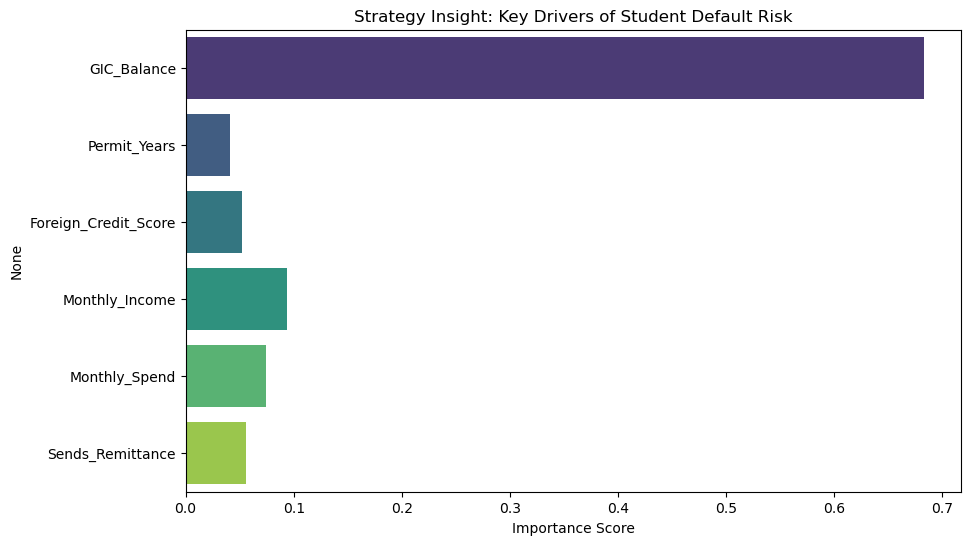

In [5]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare Data for Modeling
# Drop IDs (they aren't predictive) and the Target
X = df_canada.drop(['Student_ID', 'Default'], axis=1)
y = df_canada['Default']

# Split: 80% for Training, 20% for Testing (Simulating "Future Applicants")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train the Model
# We use XGBoost - fast, accurate, and explainable
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 3. Predict on Test Data
y_pred = model.predict(X_test)

# 4. Evaluate Performance
print("=== Model Performance Report ===")
print(classification_report(y_test, y_pred))

# 5. STRATEGIC OUTPUT: Feature Importance
# This answers: "What actually causes a student to default?"
plt.figure(figsize=(10, 6))
importance = model.feature_importances_
features = X.columns
sns.barplot(x=importance, y=features, hue=features, palette="viridis", legend=False)
plt.title("Strategy Insight: Key Drivers of Student Default Risk")
plt.xlabel("Importance Score")
plt.show()

In [6]:
import streamlit as st
import numpy as np
import pandas as pd

# (If running locally, you'd load your trained model here. 
# For this demo, we will simulate the model logic to make it standalone)

def predict_risk(gic, income, spend, permit_years, foreign_score):
    # Re-creating the logic from our "Canadian Data" generator
    risk_score = (spend / income) * 2
    
    # STRATEGY LOGIC: The "Kill Switches"
    if gic > 0:
        risk_score -= 1.5  # Huge trust for GIC
    if foreign_score > 700:
        risk_score -= 0.5  # Trust for foreign history
    if permit_years < 2:
        risk_score += 0.5  # Flight risk
        
    # Convert to probability (0 to 100%)
    prob = 1 / (1 + np.exp(-(risk_score - 1)))
    return prob

# === THE WEB APP UI ===
st.set_page_config(page_title="🇨🇦 Student Credit Risk Engine", layout="centered")

st.title("🏦 Newcomer Credit Risk Engine")
st.markdown("### Prototype: Assessing Unsecured Credit for Int'l Students")

# SIDEBAR: The Inputs (The "Application Form")
st.sidebar.header("Applicant Profile")
income = st.sidebar.slider("Monthly Income (CAD)", 0, 5000, 1500)
spend = st.sidebar.slider("Est. Monthly Spend", 0, 5000, 1200)
gic = st.sidebar.selectbox("GIC Collateral Locked?", [0, 10000, 20000])
permit_years = st.sidebar.slider("Study Permit Remaining (Years)", 1, 4, 2)
foreign_score = st.sidebar.number_input("Nova Credit Score (Home Country)", 300, 900, 650)

# LOGIC ENGINE
risk_prob = predict_risk(gic, income, spend, permit_years, foreign_score)

# DASHBOARD: The Output (The "Decision")
st.divider()

col1, col2 = st.columns(2)

with col1:
    st.metric(label="Default Probability", value=f"{risk_prob:.1%}")

with col2:
    if risk_prob < 0.3:
        st.success("✅ DECISION: APPROVE")
        st.write("**Offer:** Unsecured Card ($2,000 Limit)")
    elif risk_prob < 0.6:
        st.warning("⚠️ DECISION: REVIEW")
        st.write("**Offer:** Secured Card ($500 Limit)")
    else:
        st.error("❌ DECISION: DECLINE")
        st.write("**Reason:** High Flight Risk / Low Cash Flow")

# STRATEGY INSIGHT
st.info(f"💡 **Strategy Note:** With a GIC of ${gic:,}, the bank's risk is near-zero. "
        "We can upsell these customers to 'Premium Tier' cards immediately.")

2025-11-23 22:28:31.799 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 22:28:31.800 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 22:28:31.925 
  command:

    streamlit run /opt/miniconda3/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-11-23 22:28:31.925 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 22:28:31.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 22:28:31.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 22:28:31.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when ru

DeltaGenerator()

In [7]:
# 1. Write the code to a file named 'app.py' inside the notebook environment
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd

def predict_risk(gic, income, spend, permit_years, foreign_score):
    risk_score = (spend / income) * 2
    if gic > 0: risk_score -= 1.5
    if foreign_score > 700: risk_score -= 0.5
    if permit_years < 2: risk_score += 0.5
    prob = 1 / (1 + np.exp(-(risk_score - 1)))
    return prob

st.set_page_config(page_title="🇨🇦 Student Risk", layout="centered")
st.title("🏦 Newcomer Credit Risk Engine")

st.sidebar.header("Applicant Profile")
income = st.sidebar.slider("Monthly Income (CAD)", 0, 5000, 1500)
spend = st.sidebar.slider("Est. Monthly Spend", 0, 5000, 1200)
gic = st.sidebar.selectbox("GIC Collateral Locked?", [0, 10000, 20000])
permit_years = st.sidebar.slider("Study Permit Remaining", 1, 4, 2)
foreign_score = st.sidebar.number_input("Foreign Credit Score", 300, 900, 650)

risk_prob = predict_risk(gic, income, spend, permit_years, foreign_score)

col1, col2 = st.columns(2)
with col1: st.metric("Default Prob", f"{risk_prob:.1%}")
with col2:
    if risk_prob < 0.3: st.success("✅ APPROVE")
    elif risk_prob < 0.6: st.warning("⚠️ REVIEW")
    else: st.error("❌ DECLINE")

UsageError: Line magic function `%%writefile` not found.


In [8]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [9]:
import os

# 1. Define the code for the app as a text string
app_code = """
import streamlit as st
import numpy as np
import pandas as pd

def predict_risk(gic, income, spend, permit_years, foreign_score):
    # Re-creating the logic
    risk_score = (spend / income) * 2
    
    # STRATEGY LOGIC
    if gic > 0:
        risk_score -= 1.5
    if foreign_score > 700:
        risk_score -= 0.5
    if permit_years < 2:
        risk_score += 0.5
        
    prob = 1 / (1 + np.exp(-(risk_score - 1)))
    return prob

# UI LAYOUT
st.set_page_config(page_title="🇨🇦 Student Risk", layout="centered")
st.title("🏦 Newcomer Credit Risk Engine")

st.sidebar.header("Applicant Profile")
income = st.sidebar.slider("Monthly Income (CAD)", 0, 5000, 1500)
spend = st.sidebar.slider("Est. Monthly Spend", 0, 5000, 1200)
gic = st.sidebar.selectbox("GIC Collateral Locked?", [0, 10000, 20000])
permit_years = st.sidebar.slider("Study Permit Remaining", 1, 4, 2)
foreign_score = st.sidebar.number_input("Foreign Credit Score", 300, 900, 650)

risk_prob = predict_risk(gic, income, spend, permit_years, foreign_score)

st.divider()
col1, col2 = st.columns(2)

with col1:
    st.metric(label="Default Probability", value=f"{risk_prob:.1%}")

with col2:
    if risk_prob < 0.3:
        st.success("✅ DECISION: APPROVE")
        st.write("**Offer:** Unsecured Card ($2k Limit)")
    elif risk_prob < 0.6:
        st.warning("⚠️ DECISION: REVIEW")
        st.write("**Offer:** Secured Card ($500 Limit)")
    else:
        st.error("❌ DECISION: DECLINE")
        st.write("**Reason:** High Flight Risk")
"""

# 2. Write this string to a real file named 'app.py'
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Success! File 'app.py' has been created.")

✅ Success! File 'app.py' has been created.


In [11]:
!streamlit run app.py --server.headless true




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.203:8501
  External URL: http://76.66.133.146:8501

^C
  Stopping...


In [13]:
import os

app_code = """
import streamlit as st
import numpy as np
import pandas as pd

# === LOGIC ENGINE ===
def predict_risk_and_revenue(gic, income, spend, permit_years, foreign_score):
    # 1. BASE RISK SCORE
    risk_score = (spend / income) * 2.0
    
    # 2. STRATEGY ADJUSTMENTS (The "Kill Switches")
    reasons = []
    
    if gic > 0:
        risk_score -= 1.5
        reasons.append("✅ SECURED: GIC Collateral mitigates default risk.")
    
    if foreign_score > 700:
        risk_score -= 0.5
        reasons.append("✅ TRUST: Strong credit history in home country.")
        
    if permit_years < 1:
        risk_score += 0.8
        reasons.append("⚠️ RISK: Visa expires in <1 year (Flight Risk).")
    elif permit_years >= 3:
        risk_score -= 0.2
        reasons.append("✅ STABILITY: Long-term study permit.")

    if spend > (income * 0.9):
        reasons.append("⚠️ WARNING: Spending >90% of income.")

    # Convert to probability (0% to 100%)
    prob = 1 / (1 + np.exp(-(risk_score - 1)))
    
    # 3. PROFITABILITY MODEL (LTV Calculation)
    # Bank makes ~2% on spend (Interchange) + Interest
    annual_spend = spend * 12
    interchange_revenue = annual_spend * 0.02
    
    # If risky, we assume higher cost of funds / potential loss
    expected_loss = 2000 * prob # Assuming $2k limit
    projected_profit = interchange_revenue - expected_loss
    
    return prob, projected_profit, reasons

# === UI LAYOUT ===
st.set_page_config(page_title="🇨🇦 Student Strategy", layout="wide")

# Header
st.title("🏦 International Student Credit Engine")
st.markdown("### Strategy Prototype: Converting 'Invisible' Risk into Profit")
st.divider()

# TWO-COLUMN LAYOUT
left_col, right_col = st.columns([1, 2])

with left_col:
    st.header("👤 Applicant Profile")
    st.write("Adjust parameters to simulate applicants:")
    
    income = st.slider("Monthly Income (CAD)", 500, 5000, 1500)
    spend = st.slider("Est. Monthly Spend", 500, 5000, 1200)
    gic = st.selectbox("GIC Collateral (Locked)", [0, 10000, 20000])
    permit_years = st.slider("Study Permit Remaining (Years)", 0.5, 4.0, 2.0)
    foreign_score = st.number_input("Foreign Credit Score (Nova Credit)", 300, 900, 650)

# CALCULATE
risk_prob, profit, reasons = predict_risk_and_revenue(gic, income, spend, permit_years, foreign_score)

with right_col:
    st.header("🎯 Decision Dashboard")
    
    # ROW 1: The Big Decision
    c1, c2, c3 = st.columns(3)
    
    with c1:
        st.metric("Default Risk", f"{risk_prob:.1%}", delta_color="inverse")
    
    with c2:
        # Dynamic Color Logic
        if risk_prob < 0.3:
            st.success("✅ APPROVED")
        elif risk_prob < 0.6:
            st.warning("⚠️ MANUAL REVIEW")
        else:
            st.error("❌ DECLINED")
            
    with c3:
        st.metric("Proj. Annual Profit (LTV)", f"${profit:.2f}")

    # ROW 2: Visual Risk Meter
    st.write("Risk Threshold Meter:")
    st.progress(min(risk_prob, 1.0))
    st.caption("0% (Safe) ----------------------------------> 100% (Default)")
    
    st.divider()
    
    # ROW 3: Explainable AI (The "Why")
    st.subheader("📝 Model Reasoning")
    for r in reasons:
        st.write(r)
        
    # STRATEGY NOTE
    if profit > 100:
        st.info("💡 **Strategy Insight:** High LTV customer. Recommend offering 'Premium Rewards' to lock in loyalty.")
    elif profit < 0:
        st.error("💡 **Strategy Insight:** Negative profitability projected. Recommend declined or secured-only.")

"""

with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Version 2.0 Created! Refresh your browser tab.")
"""

_IncompleteInputError: incomplete input (3379849850.py, line 117)

In [14]:
import os

# 1. Define the code for the app as a text string
app_code = """
import streamlit as st
import numpy as np
import pandas as pd

# === LOGIC ENGINE ===
def predict_risk_and_revenue(gic, income, spend, permit_years, foreign_score):
    # 1. BASE RISK SCORE
    risk_score = (spend / income) * 2.0
    
    # 2. STRATEGY ADJUSTMENTS (The "Kill Switches")
    reasons = []
    
    if gic > 0:
        risk_score -= 1.5
        reasons.append("✅ SECURED: GIC Collateral mitigates default risk.")
    
    if foreign_score > 700:
        risk_score -= 0.5
        reasons.append("✅ TRUST: Strong credit history in home country.")
        
    if permit_years < 1:
        risk_score += 0.8
        reasons.append("⚠️ RISK: Visa expires in <1 year (Flight Risk).")
    elif permit_years >= 3:
        risk_score -= 0.2
        reasons.append("✅ STABILITY: Long-term study permit.")

    if spend > (income * 0.9):
        reasons.append("⚠️ WARNING: Spending >90% of income.")

    # Convert to probability (0% to 100%)
    prob = 1 / (1 + np.exp(-(risk_score - 1)))
    
    # 3. PROFITABILITY MODEL (LTV Calculation)
    # Bank makes ~2% on spend (Interchange) + Interest
    annual_spend = spend * 12
    interchange_revenue = annual_spend * 0.02
    
    # If risky, we assume higher cost of funds / potential loss
    expected_loss = 2000 * prob # Assuming $2k limit
    projected_profit = interchange_revenue - expected_loss
    
    return prob, projected_profit, reasons

# === UI LAYOUT ===
st.set_page_config(page_title="🇨🇦 Student Strategy", layout="wide")

# Header
st.title("🏦 International Student Credit Engine")
st.markdown("### Strategy Prototype: Converting 'Invisible' Risk into Profit")
st.divider()

# TWO-COLUMN LAYOUT
left_col, right_col = st.columns([1, 2])

with left_col:
    st.header("👤 Applicant Profile")
    st.write("Adjust parameters to simulate applicants:")
    
    income = st.slider("Monthly Income (CAD)", 500, 5000, 1500)
    spend = st.slider("Est. Monthly Spend", 500, 5000, 1200)
    gic = st.selectbox("GIC Collateral (Locked)", [0, 10000, 20000])
    permit_years = st.slider("Study Permit Remaining (Years)", 0.5, 4.0, 2.0)
    foreign_score = st.number_input("Foreign Credit Score (Nova Credit)", 300, 900, 650)

# CALCULATE
risk_prob, profit, reasons = predict_risk_and_revenue(gic, income, spend, permit_years, foreign_score)

with right_col:
    st.header("🎯 Decision Dashboard")
    
    # ROW 1: The Big Decision
    c1, c2, c3 = st.columns(3)
    
    with c1:
        st.metric("Default Risk", f"{risk_prob:.1%}", delta_color="inverse")
    
    with c2:
        # Dynamic Color Logic
        if risk_prob < 0.3:
            st.success("✅ APPROVED")
        elif risk_prob < 0.6:
            st.warning("⚠️ MANUAL REVIEW")
        else:
            st.error("❌ DECLINED")
            
    with c3:
        st.metric("Proj. Annual Profit (LTV)", f"${profit:.2f}")

    # ROW 2: Visual Risk Meter
    st.write("Risk Threshold Meter:")
    st.progress(min(risk_prob, 1.0))
    st.caption("0% (Safe) ----------------------------------> 100% (Default)")
    
    st.divider()
    
    # ROW 3: Explainable AI (The "Why")
    st.subheader("📝 Model Reasoning")
    for r in reasons:
        st.write(r)
        
    # STRATEGY NOTE
    if profit > 100:
        st.info("💡 **Strategy Insight:** High LTV customer. Recommend offering 'Premium Rewards' to lock in loyalty.")
    elif profit < 0:
        st.error("💡 **Strategy Insight:** Negative profitability projected. Recommend declined or secured-only.")
"""

# 2. Write this string to a real file named 'app.py'
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Version 2.0 Created! Refresh your browser tab.")

✅ Version 2.0 Created! Refresh your browser tab.


In [ ]:
!streamlit run app.py --server.headless true




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.203:8501
  External URL: http://76.66.133.146:8501

